<a href="https://colab.research.google.com/gist/Ridhima28/7b77db671d65b79eb68d0c3353bf9b17/brain-tumor-final-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, model_from_json
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Dropout, Activation, Flatten, Dense
from keras.optimizers import Adam
from keras import backend as k
import tensorflow as tf

In [ ]:
!pip install kaggle 


In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"ridhimaprashanth22","key":"e0c1fa6441c7e95a36094f9c5e094aaa"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection -p /content
!unzip \*.zip

In [ ]:
image_dir="/content/brain_tumor_dataset"

In [ ]:
# Creates a folder for training and testing sets
!mkdir test
!mkdir train
!mkdir train/yes
!mkdir train/no
!mkdir test/yes
!mkdir test/no

In [ ]:
# Divide files into training and testing folders
IMG_PATH = 'brain_tumor_dataset/' # unzipped folder
import os, shutil
# split the data by train/test
for CLASS in os.listdir(IMG_PATH):
    if not CLASS.startswith('.'):
      dir  = os.path.isdir(IMG_PATH + CLASS)
      if dir:
        IMG_NUM = len(os.listdir(IMG_PATH + CLASS))
        for (n, FILE_NAME) in enumerate(os.listdir(IMG_PATH + CLASS)):
            img = IMG_PATH + CLASS + '/' + FILE_NAME
            if n < 0.8*IMG_NUM:
                shutil.copy(img, 'train/' + CLASS + '/' + FILE_NAME)
            else:
                shutil.copy(img, 'test/'+ CLASS + '/' + FILE_NAME)


In [ ]:
train_file_count = sum(len(files) for _, _, files in os.walk(r'train'))
test_file_count = sum(len(files) for _, _, files in os.walk(r'test'))

print("Number of files in train set ", train_file_count)
print("Number of files in test set ", test_file_count)

In [ ]:
train_dir = "/content/train"
test_dir = "/content/test"


In [ ]:
img_width, img_height = 224, 224
img_size = (224, 224)
batch_size = 16 
epochs = 25

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   validation_split=0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2, 
                                   horizontal_flip= True, 
                                   rotation_range=0.1)
valid_datagen = ImageDataGenerator(rescale=1./255, 
                                   validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                                              subset='training',
                                              shuffle=True, 
                                              seed=42, 
                                              target_size=img_size,
                                              batch_size=batch_size,
                                              class_mode='binary')

validation_generator = valid_datagen.flow_from_directory(train_dir, 
                                              subset='validation',
                                              seed=42, 
                                              target_size=img_size,
                                              batch_size = batch_size,
                                              class_mode='binary')

In [ ]:
if k.image_data_format() == "channels_first":
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    
input_shape

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model = tf.keras.models.Sequential([
    # First Convolution
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Second Convolution
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Third Convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten
    tf.keras.layers.Flatten(),
    # Dense layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

In [ ]:
model.summary()

In [ ]:
history = model.fit(train_generator,epochs = epochs,
                             validation_data= validation_generator)

Epoch 1/25
11/11 [==============================] - 9s 220ms/step - loss: 1.6107 - accuracy: 0.6002 - val_loss: 0.6265 - val_accuracy: 0.6667
Epoch 2/25
11/11 [==============================] - 2s 189ms/step - loss: 0.6182 - accuracy: 0.6711 - val_loss: 0.5613 - val_accuracy: 0.6923
Epoch 3/25
11/11 [==============================] - 2s 192ms/step - loss: 0.5983 - accuracy: 0.7646 - val_loss: 0.5487 - val_accuracy: 0.7436
Epoch 4/25
11/11 [==============================] - 2s 194ms/step - loss: 0.5924 - accuracy: 0.7021 - val_loss: 0.5443 - val_accuracy: 0.7692
Epoch 5/25
11/11 [==============================] - 2s 192ms/step - loss: 0.5955 - accuracy: 0.6803 - val_loss: 0.5761 - val_accuracy: 0.6923
Epoch 6/25
11/11 [==============================] - 2s 191ms/step - loss: 0.5569 - accuracy: 0.7136 - val_loss: 0.5244 - val_accuracy: 0.7692
Epoch 7/25
11/11 [==============================] - 2s 188ms/step - loss: 0.4328 - accuracy: 0.8222 - val_loss: 0.5343 - val_accuracy: 0.7692
Epoch 

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")
model.save("full_model.h5")
print("Saved full model to disk")

Saved model to disk
Saved full model to disk


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


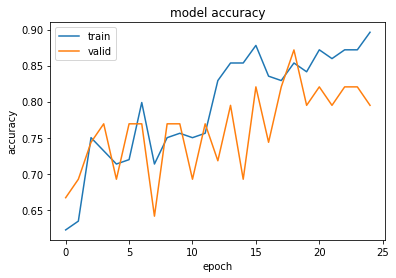

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

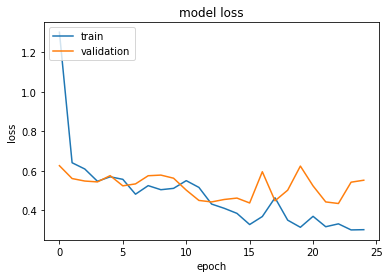

In [ ]:
# summarize history for loss on a line chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# load json file and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
from keras.models import load_model #to load the model saved as a h5 file
# load model
full_model = load_model('full_model.h5')

In [ ]:
# load test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a flow from the directory for validation data - seed=42
test_generator = test_datagen.flow_from_directory(test_dir,  
                                              target_size=img_size,
                                              batch_size = batch_size,
                                              class_mode='binary')

Found 50 images belonging to 2 classes.


In [ ]:
model.evaluate(test_generator)

4/4 [==============================] - 0s 60ms/step - loss: 0.4400 - accuracy: 0.8800


[0.4400472939014435, 0.8799999952316284]

In [ ]:
total_images = test_generator.n  
steps = total_images//batch_size 

x_test , y_true = [] , []
for i in range(steps):
    a , b = test_generator.next()
    x_test.extend(a) 
    y_true.extend(b)
    
x_test , y_true = np.array(x_test), np.array(y_true)

In [ ]:
# Get prediction probabilities from model
probabilities = model.predict(x_test)

# Because this is a binary classification problem, you have to find predicted labels
y_pred = probabilities > 0.5

In [ ]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

# Classification report will show us precision, recall and F1 Score of the model
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

         0.0       0.87      0.76      0.81        17
         1.0       0.88      0.94      0.91        31

    accuracy                           0.88        48
   macro avg       0.87      0.85      0.86        48
weighted avg       0.87      0.88      0.87        48



In [ ]:
conf_mat = confusion_matrix(y_true, y_pred)
print(conf_mat)

[[13  4]
 [ 2 29]]


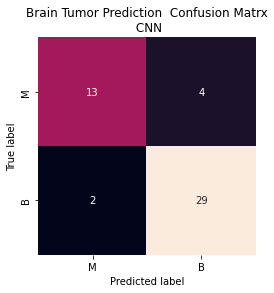

In [ ]:
# Using Seaborn to display Confusion Matrix Beautifully
# Transform to df for easier plotting

cm_df = pd.DataFrame(conf_mat,
                     index = ['M','B'], 
                     columns = ['M','B'])

plt.figure(figsize=(4,4))
sns.heatmap(cm_df, annot=True, square=True, cbar=False, fmt="d")
plt.title('Brain Tumor Prediction  Confusion Matrx\n CNN')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.figtext(1.30, 0.01, 'Accuracy: {}%\n Sensitivity: {}\n Specificity: {} '.format(round(svc_accuracy, 2),round(sensitivity, 2),round(specificity, 2)), horizontalalignment='right')
plt.show()

In [ ]:
# Note: The model has not seen these images before
# Importing modules for loading, transforming and displaying images
from IPython.display import display
from PIL import Image
import os
from keras.preprocessing import image

yes_brain_tumor_test_dir = f"{test_dir}/content/test/yes"
no_brain_tumor_test_dir = f"{test_dir}/content/test/no"

# read all images in test directory
img_paths = []
for imgs in os.listdir(yes_brain_tumor_test_dir):
    #print(imgs)
    file = f"{yes_brain_tumor_test_dir}/{imgs}"
    img_paths.append(file)

FileNotFoundError: ignored

In [ ]:
# Testing the custom trained ConvNet model 
for i,(img) in enumerate(img_paths):
    img = image.load_img(img, target_size=(img_width, img_height))
    display(img)
    
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    result = full_model.predict(img)
    #result = vgg_binary.predict(img)
    if result[0][0] >= 0.5:
        prediction = 'Yes'
    else:
        prediction = 'No'
        
    print(prediction)

    if(i>9):
      break

### Transfer Learning with VGG19 

In [ ]:
# libraries for pretrained models
from keras.applications.resnet import ResNet101
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.inception_v3 import InceptionV3

from keras.models import Sequential, Model

# loading the pretrained model
vgg_pre_trained_model = VGG19(input_shape = input_shape, 
                                include_top = False, 
                                weights = 'imagenet')

# freezing parameters in convolutional layers
for layer in vgg_pre_trained_model.layers:
    layer.trainable = False

vgg_pre_trained_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# building the model
def build_my_model(model_name):
 
    new_model = Sequential()
    model = vgg_pre_trained_model
    # Add the convolutional part of the VGG19 model from above.
    new_model.add(model)
    # Create a custom classifier 
    new_model.add(Flatten())
    new_model.add(Dense(256, activation='relu'))
    new_model.add(Dropout(0.4))
    new_model.add(Dense(512, activation='relu'))
    new_model.add(Dropout(0.5))
    new_model.add(Dense(256, activation='relu'))
    new_model.add(Dropout(0.5))
    new_model.add(Dense(1, activation='sigmoid')) #softmax
    
    return new_model
# building vggnet model
my_vgg_model = build_my_model(vgg_pre_trained_model)

# building resnet model
# my_resnet_model = build_my_model(resnet_pre_trained_model)

my_vgg_model.summary()
my_model = my_vgg_model

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_9 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               6422784   
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)              

In [ ]:
# define hyperparameters
from keras.callbacks import ModelCheckpoint, EarlyStopping

## Set our optimizer, loss function, and learning rate
optimizer = Adam(lr=1e-3) # RMSprop(learning_rate=1e-4)
loss = 'binary_crossentropy' #categorical_crossentropy
metrics = ['accuracy']

model_path="{}_my_model.bestv.hdf5".format('class')

# save the weights of the best model during training
checkpoint = ModelCheckpoint(model_path, 
                             monitor= 'val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode= 'auto', 
                             save_weights_only = True)

# if results have not improved after a certain number of epochs, stop training.
early = EarlyStopping(monitor= 'val_loss', 
                      mode= 'auto', 
                      patience=10)

callbacks_list = [checkpoint, early]

In [ ]:
## train your model
my_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# my_model.load_weights(weight_path)
# Saving the history of training epochs and associated metrics to a variable (history) 
history = my_model.fit(train_generator, 
                          validation_data = validation_generator, 
                          epochs = 25 , 
                          callbacks = callbacks_list)

Epoch 1/25
11/11 [==============================] - 3s 244ms/step - loss: 1.6563 - accuracy: 0.5258 - val_loss: 2.6071 - val_accuracy: 0.6154

Epoch 00001: val_loss improved from inf to 2.60712, saving model to class_my_model.bestv.hdf5
Epoch 2/25
11/11 [==============================] - 2s 225ms/step - loss: 2.3202 - accuracy: 0.5990 - val_loss: 0.9018 - val_accuracy: 0.6154

Epoch 00002: val_loss improved from 2.60712 to 0.90179, saving model to class_my_model.bestv.hdf5
Epoch 3/25
11/11 [==============================] - 2s 223ms/step - loss: 2.5137 - accuracy: 0.4898 - val_loss: 0.7901 - val_accuracy: 0.6154

Epoch 00003: val_loss improved from 0.90179 to 0.79009, saving model to class_my_model.bestv.hdf5
Epoch 4/25
11/11 [==============================] - 2s 222ms/step - loss: 0.9979 - accuracy: 0.6561 - val_loss: 0.5553 - val_accuracy: 0.7436

Epoch 00004: val_loss improved from 0.79009 to 0.55532, saving model to class_my_model.bestv.hdf5
Epoch 5/25
11/11 [======================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


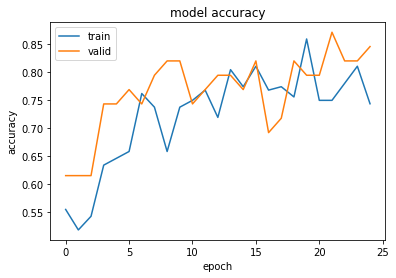

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

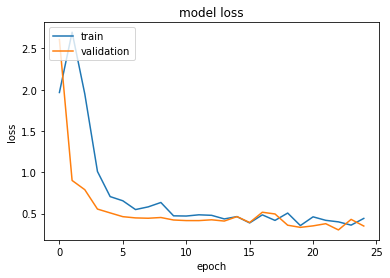

In [ ]:
# summarize history for loss on a line chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# load test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a flow from the directory for validation data - seed=42
test_generator = test_datagen.flow_from_directory(test_dir,  
                                              target_size=img_size,
                                              batch_size = batch_size,
                                              class_mode='binary')

my_model.evaluate(test_generator)

Found 50 images belonging to 2 classes.
4/4 [==============================] - 0s 62ms/step - loss: 0.4269 - accuracy: 0.8200


[0.4269023537635803, 0.8199999928474426]

In [ ]:
# test_data = []
# test_labels = []
# batch_index = 0

# while batch_index <= test_generator.batch_index:
#     data = next(test_generator)
#     test_data.append(data[0])
#     test_labels.append(data[1])
#     batch_index = batch_index + 1

# test_data_array = np.asarray(test_data)
# test_labels_array = np.asarray(test_labels)
# y_true = test_labels_array

# test_data_array.shape

In [ ]:
y_true = test_generator.classes

# Get prediction probabilities from model
probabilities = my_model.predict(test_generator)
# Because this is a binary classification problem, you have to find predicted labels
y_pred = probabilities > 0.5


In [ ]:
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.41      0.47      0.44        19
           1       0.64      0.58      0.61        31

    accuracy                           0.54        50
   macro avg       0.53      0.53      0.52        50
weighted avg       0.55      0.54      0.55        50



In [ ]:
accuracy = accuracy_score(y_true, y_pred)
print(accuracy)


0.54


In [ ]:
conf_mat = confusion_matrix(y_true, y_pred)


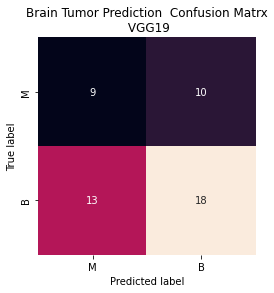

In [ ]:
# Using Seaborn to display Confusion Matrix Beautifully
# Transform to df for easier plotting

cm_df = pd.DataFrame(conf_mat,
                     index = ['M','B'], 
                     columns = ['M','B'])

plt.figure(figsize=(4,4))
sns.heatmap(cm_df, annot=True, square=True, cbar=False, fmt="d")
plt.title('Brain Tumor Prediction  Confusion Matrx\n VGG19')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.figtext(1.30, 0.01, 'Accuracy: {}%\n Sensitivity: {}\n Specificity: {} '.format(round(svc_accuracy, 2),round(sensitivity, 2),round(specificity, 2)), horizontalalignment='right')
plt.show()

### Transfer Learning with ResNet101 

In [ ]:
# loading the pretrained model
resnet_pre_trained_model = ResNet101(input_shape = input_shape, 
                                 include_top = False, 
                                 weights = 'imagenet')

# freezing parameters in convolutional layers
for layer in resnet_pre_trained_model.layers:
    layer.trainable = False

resnet_pre_trained_model.summary()

Model: "resnet101"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________

In [ ]:
# building the model
def build_my_model(model_name):
 
    new_model = Sequential()
    model = resnet_pre_trained_model
    # Add the convolutional part of the VGG19 model from above.
    new_model.add(model)
    # Create a custom classifier 
    new_model.add(Flatten())
    new_model.add(Dense(256, activation='relu'))
    new_model.add(Dropout(0.4))
    new_model.add(Dense(512, activation='relu'))
    new_model.add(Dropout(0.5))
    new_model.add(Dense(256, activation='relu'))
    new_model.add(Dropout(0.5))
    new_model.add(Dense(1, activation='sigmoid')) #softmax
    
    return new_model
# building vggnet model

my_resnet_model = build_my_model(resnet_pre_trained_model)

my_resnet_model.summary()
my_model = my_resnet_model

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101 (Functional)       (None, 7, 7, 2048)        42658176  
_________________________________________________________________
flatten_10 (Flatten)         (None, 100352)            0         
_________________________________________________________________
dense_38 (Dense)             (None, 256)               25690368  
_________________________________________________________________
dropout_27 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 256)             

In [ ]:
# define hyperparameters
from keras.callbacks import ModelCheckpoint, EarlyStopping

## Set our optimizer, loss function, and learning rate
optimizer = Adam(lr=1e-3) # RMSprop(learning_rate=1e-4)
loss = 'binary_crossentropy' #categorical_crossentropy
metrics = ['accuracy']

model_path="{}_my_model.bestv.hdf5".format('class')

# save the weights of the best model during training
checkpoint = ModelCheckpoint(model_path, 
                             monitor= 'val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode= 'auto', 
                             save_weights_only = True)

# if results have not improved after a certain number of epochs, stop training.
early = EarlyStopping(monitor= 'val_loss', 
                      mode= 'auto', 
                      patience=10)

callbacks_list = [checkpoint, early]

In [ ]:
## train your model
my_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# my_model.load_weights(weight_path)
# Saving the history of training epochs and associated metrics to a variable (history) 
history = my_model.fit(train_generator, 
                          validation_data = validation_generator, 
                          epochs = 25 , 
                          callbacks = callbacks_list)

Epoch 1/25
11/11 [==============================] - 9s 381ms/step - loss: 0.6528 - accuracy: 0.6635 - val_loss: 0.6451 - val_accuracy: 0.6410

Epoch 00001: val_loss did not improve from 0.60398
Epoch 2/25
11/11 [==============================] - 3s 226ms/step - loss: 0.6793 - accuracy: 0.5826 - val_loss: 0.6425 - val_accuracy: 0.5641

Epoch 00002: val_loss did not improve from 0.60398
Epoch 3/25
11/11 [==============================] - 3s 251ms/step - loss: 0.6494 - accuracy: 0.6614 - val_loss: 0.6500 - val_accuracy: 0.6410

Epoch 00003: val_loss did not improve from 0.60398
Epoch 4/25
11/11 [==============================] - 3s 234ms/step - loss: 0.6470 - accuracy: 0.6603 - val_loss: 0.6478 - val_accuracy: 0.6667

Epoch 00004: val_loss did not improve from 0.60398
Epoch 5/25
11/11 [==============================] - 3s 249ms/step - loss: 0.6964 - accuracy: 0.6047 - val_loss: 0.6712 - val_accuracy: 0.5641

Epoch 00005: val_loss did not improve from 0.60398
Epoch 6/25
11/11 [============

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


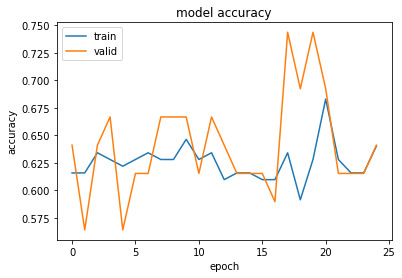

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

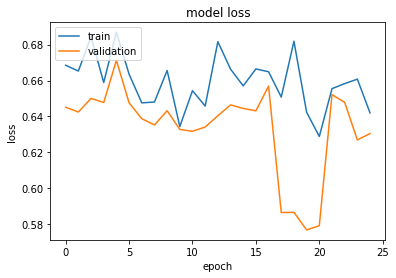

In [ ]:
# summarize history for loss on a line chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# load test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a flow from the directory for validation data - seed=42
test_generator = test_datagen.flow_from_directory(test_dir,  
                                              target_size=img_size,
                                              batch_size = batch_size,
                                              class_mode='binary',
                                              shuffle=False)

my_model.evaluate(test_generator)

Found 50 images belonging to 2 classes.
4/4 [==============================] - 0s 85ms/step - loss: 0.6917 - accuracy: 0.6000


[0.6916986703872681, 0.6000000238418579]

In [ ]:
y_true = test_generator.classes

# Get prediction probabilities from model
probabilities = my_model.predict(test_generator)
# Because this is a binary classification problem, you have to find predicted labels
y_pred = probabilities > 0.5

In [ ]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

# Classification report will show us precision, recall and F1 Score of the model
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.33      0.05      0.09        19
           1       0.62      0.94      0.74        31

    accuracy                           0.60        50
   macro avg       0.48      0.49      0.42        50
weighted avg       0.51      0.60      0.50        50



In [ ]:
accuracy = accuracy_score(y_true, y_pred)
print(accuracy)


0.6


In [ ]:
conf_mat = confusion_matrix(y_true, y_pred)
print(conf_mat)

[[ 1 18]
 [ 2 29]]


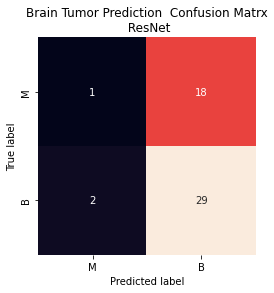

In [ ]:
# Using Seaborn to display Confusion Matrix Beautifully
# Transform to df for easier plotting

cm_df = pd.DataFrame(conf_mat,
                     index = ['M','B'], 
                     columns = ['M','B'])

plt.figure(figsize=(4,4))
sns.heatmap(cm_df, annot=True, square=True, cbar=False, fmt="d")
plt.title('Brain Tumor Prediction  Confusion Matrx\n ResNet')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.figtext(1.30, 0.01, 'Accuracy: {}%\n Sensitivity: {}\n Specificity: {} '.format(round(svc_accuracy, 2),round(sensitivity, 2),round(specificity, 2)), horizontalalignment='right')
plt.show()

Inception v-3

In [ ]:
# loading the pretrained model
inception_pre_trained_model = InceptionV3(input_shape = input_shape, 
                                 include_top = False, 
                                 weights = 'imagenet')

# freezing parameters in convolutional layers
for layer in inception_pre_trained_model.layers:
    layer.trainable = False

inception_pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_191 (Conv2D)             (None, 111, 111, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 111, 111, 32) 96          conv2d_191[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 111, 111, 32) 0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [ ]:
# building the model
def build_my_model(model_name):
 
    new_model = Sequential()
    model = resnet_pre_trained_model
    # Add the convolutional part of the VGG19 model from above.
    new_model.add(model)
    # Create a custom classifier 
    new_model.add(Flatten())
    new_model.add(Dense(256, activation='relu'))
    new_model.add(Dropout(0.4))
    new_model.add(Dense(512, activation='relu'))
    new_model.add(Dropout(0.5))
    new_model.add(Dense(256, activation='relu'))
    new_model.add(Dropout(0.5))
    new_model.add(Dense(1, activation='sigmoid')) #softmax
    
    return new_model

my_inception_model = build_my_model(inception_pre_trained_model)

my_inception_model.summary()
my_model = my_inception_model

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101 (Functional)       (None, 7, 7, 2048)        42658176  
_________________________________________________________________
flatten_11 (Flatten)         (None, 100352)            0         
_________________________________________________________________
dense_42 (Dense)             (None, 256)               25690368  
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_31 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 256)             

In [ ]:
# define hyperparameters
from keras.callbacks import ModelCheckpoint, EarlyStopping

## Set our optimizer, loss function, and learning rate
optimizer = Adam(lr=1e-3) # RMSprop(learning_rate=1e-4)
loss = 'binary_crossentropy' #categorical_crossentropy
metrics = ['accuracy']

model_path="{}_my_model.bestv.hdf5".format('class')

# save the weights of the best model during training
checkpoint = ModelCheckpoint(model_path, 
                             monitor= 'val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode= 'auto', 
                             save_weights_only = True)

# if results have not improved after a certain number of epochs, stop training.
early = EarlyStopping(monitor= 'val_loss', 
                      mode= 'auto', 
                      patience=10)

callbacks_list = [checkpoint, early]

In [ ]:
## train your model
my_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# my_model.load_weights(weight_path)
# Saving the history of training epochs and associated metrics to a variable (history) 
history = my_model.fit(train_generator, 
                          validation_data = validation_generator, 
                          epochs = 25 , 
                          callbacks = callbacks_list)

Epoch 1/25
11/11 [==============================] - 9s 374ms/step - loss: 8.7509 - accuracy: 0.5603 - val_loss: 3.9183 - val_accuracy: 0.5128

Epoch 00001: val_loss did not improve from 0.57691
Epoch 2/25
11/11 [==============================] - 3s 232ms/step - loss: 20.4994 - accuracy: 0.5423 - val_loss: 1.7774 - val_accuracy: 0.5641

Epoch 00002: val_loss did not improve from 0.57691
Epoch 3/25
11/11 [==============================] - 3s 229ms/step - loss: 4.8342 - accuracy: 0.5303 - val_loss: 0.8718 - val_accuracy: 0.5641

Epoch 00003: val_loss did not improve from 0.57691
Epoch 4/25
11/11 [==============================] - 3s 232ms/step - loss: 1.0762 - accuracy: 0.5195 - val_loss: 0.7230 - val_accuracy: 0.5128

Epoch 00004: val_loss did not improve from 0.57691
Epoch 5/25
11/11 [==============================] - 3s 248ms/step - loss: 0.7209 - accuracy: 0.5777 - val_loss: 0.7439 - val_accuracy: 0.4103

Epoch 00005: val_loss did not improve from 0.57691
Epoch 6/25
11/11 [===========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


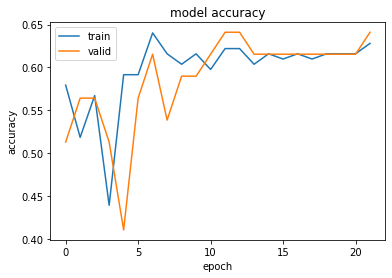

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

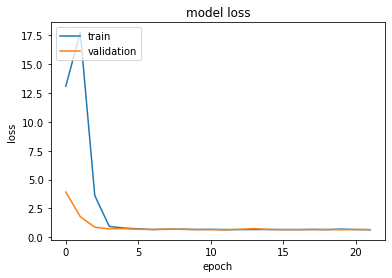

In [ ]:
# summarize history for loss on a line chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# load test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a flow from the directory for validation data - seed=42
test_generator = test_datagen.flow_from_directory(test_dir,  
                                              target_size=img_size,
                                              batch_size = batch_size,
                                              class_mode='binary',
                                              shuffle=False)

my_model.evaluate(test_generator)

Found 50 images belonging to 2 classes.
4/4 [==============================] - 0s 76ms/step - loss: 0.6300 - accuracy: 0.6800


[0.6299576759338379, 0.6800000071525574]

In [ ]:
y_true = test_generator.classes

# Get prediction probabilities from model
probabilities = my_model.predict(test_generator)
# Because this is a binary classification problem, you have to find predicted labels
y_pred = probabilities > 0.5

In [ ]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

# Classification report will show us precision, recall and F1 Score of the model
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.16      0.27        19
           1       0.66      1.00      0.79        31

    accuracy                           0.68        50
   macro avg       0.83      0.58      0.53        50
weighted avg       0.79      0.68      0.60        50



In [ ]:
accuracy = accuracy_score(y_true, y_pred)
print(accuracy)

0.68


In [ ]:
conf_mat = confusion_matrix(y_true, y_pred)
print(conf_mat)

[[ 3 16]
 [ 0 31]]


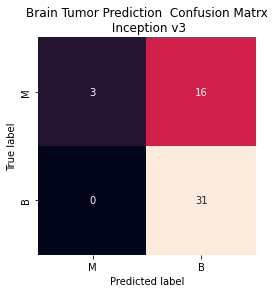

In [ ]:
# Using Seaborn to display Confusion Matrix Beautifully
# Transform to df for easier plotting

cm_df = pd.DataFrame(conf_mat,
                     index = ['M','B'], 
                     columns = ['M','B'])

plt.figure(figsize=(4,4))
sns.heatmap(cm_df, annot=True, square=True, cbar=False, fmt="d")
plt.title('Brain Tumor Prediction  Confusion Matrx\n Inception v3')
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.figtext(1.30, 0.01, 'Accuracy: {}%\n Sensitivity: {}\n Specificity: {} '.format(round(svc_accuracy, 2),round(sensitivity, 2),round(specificity, 2)), horizontalalignment='right')
plt.show()